<p>I have created a new notebook that will serve as an overall record to my progress.  The results from the previous "Selecting Giants..." code have been adapted here.  I have implemented David's suggestion using numpy.where to make cuts in the data.  This has been done in the interest of efficiency  </p>

In [ ]:
#Load astropy
from astropy.io import fits
from astropy.table import Table
import numpy

#Load data
spec2 = Table(fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\ssppOut-dr10.fits.gz',1))

#Making cuts in LAMOST data
ind=numpy.where((spec2['TEFF_ADOP']>4050)
    &(spec2['TEFF_ADOP']<5875)
    &(spec2['LOGG_ADOP']<3.8)
    &(spec2['LOGG_ADOP']>0)
    &((spec2['LOGG_ADOP']-1.86)/(spec2['TEFF_ADOP']- 4035)<0.00345))
    
ind
#spec2r=spec2[ind]

In [ ]:
#Plotting logg vs Teff for SDSS data
%matplotlib nbagg
import matplotlib.pyplot as plt
y=spec2r['LOGG_ADOP']
x=spec2r['TEFF_ADOP']

#plt.figure(figsize=(18,18))
plt.scatter(x,y,marker='+',c='blue',s=3)
plt.xlabel('$T_{eff}$',fontsize=15)
plt.ylabel('log(g)',rotation='horizontal',labelpad=25,fontsize=18)
plt.gcf().subplots_adjust(left=0.20)
#plt.xlim(3000,7000)
#plt.ylim(0,6)
c

ax=plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()

plt.title('SDSS Selected Giants')

plt.show()

In [ ]:
spec2r.write('ssppgiants.fits', format='fits')

<p>Here I demonstrate that it is unnecessary to make cuts in the LAMOST data as the giants have already been selected  </p>

In [ ]:
#Load astropy
from astropy.io import fits
from astropy.table import Table
import numpy

#Load LAMOST data
spec3 = Table(fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\Ho2017_Catalog.fits',1))

#Plotting logg vs Teff for LAMOST data
%matplotlib nbagg
import matplotlib.pyplot as plt
y=spec3['logg']
x=spec3['Teff']

#plt.figure(figsize=(18,18))
plt.scatter(x,y,marker='+',c='blue',s=3)
plt.xlabel('$T_{eff}$',fontsize=15)
plt.ylabel('log(g)',rotation='horizontal',labelpad=25,fontsize=18)
plt.gcf().subplots_adjust(left=0.20)
#plt.xlim(3000,7000)
#plt.ylim(0,6)
plt.figsize=(18,16)

ax=plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()

plt.title('LAMOST Giants')

plt.show()

<p>I explored the use of over-density plots rather than scatter plots to show more detail in my graphs. (The LAMOST plot took several hours due to the number of data points). I employed the function gaussian_kde from scipy in order to calculate point density. </p>

In [ ]:
#Load libraries and functions
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
from scipy.stats import gaussian_kde

#Load LAMOST data
spec3 = Table(fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\Ho2017_Catalog.fits',1))

#Plotting logg vs Teff for LAMOST data
%matplotlib nbagg
import matplotlib.pyplot as plt
y=spec3['logg']
x=spec3['Teff']

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

#plt.figure(figsize=(18,18))
plt.scatter(x,y,c=z,marker='+',s=3)
plt.xlabel('$T_{eff}$',fontsize=15)
plt.ylabel('log(g)',rotation='horizontal',labelpad=25,fontsize=18)
plt.gcf().subplots_adjust(left=0.20)
#plt.xlim(3000,7000)
#plt.ylim(0,6)
plt.figsize=(18,16)

ax=plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()

plt.title('LAMOST Giants')

plt.show()

In [ ]:
#Plotting logg vs Teff for SDSS data
#Load libraries and functions
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
from scipy.stats import gaussian_kde
%matplotlib nbagg
import matplotlib.pyplot as plt

#Define axes/variables
y=spec2r['LOGG_ADOP']
x=spec2r['TEFF_ADOP']

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

#Scatter plot
plt.scatter(x,y,c=z,marker='+',s=3)
plt.xlabel('$T_{eff}$',fontsize=15)
plt.ylabel('log(g)',rotation='horizontal',labelpad=25,fontsize=15)
plt.gcf().subplots_adjust(left=0.20)
plt.figsize=(18,16)
ax=plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()
plt.title('SDSS Selected Giants',fontsize=15)

plt.show()

<p> I loaded the Munn data and prepared for cross-matching. </p>

In [ ]:
#Plotting RA vs. DEC for Munn data alone
#Load libraries and functions
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
from scipy.stats import gaussian_kde
%matplotlib nbagg
import matplotlib.pyplot as plt

#Import DDO51 photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Set variables for RA and DEC as y and x
y1=phot['DEC']
x1=phot['RA']

# Calculate the point density for Munn Giants
xy = np.vstack([x1,y1])
z = gaussian_kde(xy)(xy)

#Scatter plot
plt.scatter(x1,y1,c=z,marker='+',s=3)
plt.xlabel('DEC',fontsize=14)
plt.ylabel('RA',rotation='horizontal',fontsize=14)
plt.figsize=(18,16)
ax=plt.gca()
plt.title('Munn Giants On-Sky Locations',fontsize=14)

plt.show()

<p>I then loaded the SDSS fitz file with the cuts I had made previously, and cross-matched with the DDO51 photometric data. </p>

In [ ]:
#Load libraries and functions
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u

#Import DDO51 photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Import the calibration data (i.e. SDSS with cuts)
spec = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\ssppgiants.fits',1)

#Cross-matching


#defines on-sky locations of photometric data and spectroscopic data as variables
c_phot=SkyCoord(ra=phot['RA']*u.degree,dec=phot['DEC']*u.degree)
c_spec=SkyCoord(ra=spec['RA']*u.degree,dec=spec['DEC']*u.degree)

#d2d represents on-sky distances
idx, d2d, d3d = c_phot.match_to_catalog_sky(c_spec) 
good=(d2d.arcsec < .1)

<p>Plotted the photometric and spectroscopic star locations separately and after cross-matching for comparison.</p>

In [ ]:
#Import libraries and functions
from scipy.stats import kde
from scipy.stats import gaussian_kde
%matplotlib nbagg

#Set variables for RA and DEC of spec data as y and x
y2=spec['DEC']
x2=spec['RA']

# Calculate the point density for SDSS giants
xy = np.vstack([x2,y2])
z = gaussian_kde(xy)(xy)

#Scatter plot of SDSS sky locations
plt.scatter(x2,y2,c=z,marker='+',s=3)
plt.xlabel('DEC',fontsize=14)
plt.ylabel('RA',rotation='horizontal',fontsize=14)
plt.figsize=(18,16)
plt.title('SDSS Giants On-Sky Locations',fontsize=14)

plt.show()

In [ ]:
cmssppgiants=phot[good]

In [ ]:
#Import libraries and functions
from scipy.stats import kde
from scipy.stats import gaussian_kde
%matplotlib nbagg

#Set variables for RA and DEC of matched data as y and x
y3=cmssppgiants['DEC']
x3=cmssppgiants['RA']

# Calculate the point density for matched giants
xy1 = np.vstack([x3,y3])
z = gaussian_kde(xy1)(xy1)

#Scatter plot of matched sky locations
plt.scatter(x3,y3,c=z,marker='+',s=3)
plt.xlabel('DEC',fontsize=14)
plt.ylabel('RA',rotation='horizontal',fontsize=14)
plt.figsize=(18,16)
ax=plt.gca()
plt.title('SDSS/Munn Matched Giants On-Sky Locations',fontsize=14)

plt.show()

<p>As far as I understand it, the "good" variable is an index of all the points in phot that have matches in the spec (SDSS) catalog I created.</p>

<p>I read a tutorial online on how to use SkyCoord to perform cross-matching.  A useful plot is the histogram below.  It shows how separated the data points are within d2d (on-sky distance).</p>

In [ ]:
#Import libraries and functions
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

plt.hist(d2d[good].arcsec, histtype='step', range=(0,2))
plt.xlabel('separation [arcsec]')
plt.tight_layout()

plt.show()

<p>Removing duplicates using KDTREE.</p>

In [ ]:
#Import numpy and scipy
import numpy
import scipy

def printRepeating(arr, size):
 
    print("Repeating elements are ",
                         end = '')
    for i in range (0, size):
        for j in range (i + 1, size):
            if arr[i] == arr[j]:
                print(arr[i], end = ' ')
                
printRepeating(cmssppgiants['ra'],351)
#cmssppgiants['ra']

In [ ]:
cmssppgiants['ra']

<p>Apply the same process to cross-match with LAMOST data.</p>

In [ ]:
#Load libraries and functions
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u

#Import DDO51 photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Import the calibration data (LAMOST)
spec = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\Ho2017_Catalog.fits',1)

#Cross-matching
#defines on-sky locations of photometric data and spectroscopic data as variables
c_phot=SkyCoord(ra=phot['RA']*u.degree,dec=phot['DEC']*u.degree)
c_spec=SkyCoord(ra=spec['RA']*u.degree,dec=spec['DEC']*u.degree)

#d2d represents on-sky distances
idx, d2d, d3d = c_phot.match_to_catalog_sky(c_spec) 
good=(d2d.arcsec < .1)

In [ ]:
#Import libraries and functions
from scipy.stats import kde
from scipy.stats import gaussian_kde
%matplotlib nbagg

#Set variables for RA and DEC of spec data as y and x
y2=spec['DEC']
x2=spec['RA']

# Calculate the point density for SDSS giants
xy = np.vstack([x2,y2])
z = gaussian_kde(xy)(xy)

#Scatter plot of SDSS sky locations
plt.scatter(x2,y2,c=z,marker='+',s=3)
plt.xlabel('DEC',fontsize=14)
plt.ylabel('RA',rotation='horizontal',fontsize=14)
plt.figsize=(18,16)
plt.title('LAMOST Giants On-Sky Locations',fontsize=14)

plt.show()

In [ ]:
LAMOSTgiants=phot[good]

In [ ]:
#Import libraries and functions
from scipy.stats import kde
from scipy.stats import gaussian_kde
%matplotlib nbagg

#Set variables for RA and DEC of matched data as y and x
y3=LAMOSTgiants['DEC']
x3=LAMOSTgiants['RA']

# Calculate the point density for matched giants
xy1 = np.vstack([x3,y3])
z = gaussian_kde(xy1)(xy1)

#Scatter plot of matched sky locations
plt.scatter(x3,y3,c=z,marker='+',s=3)
plt.xlabel('DEC',fontsize=14)
plt.ylabel('RA',rotation='horizontal',fontsize=14)
plt.figsize=(18,16)
ax=plt.gca()
plt.title('LAMOST/Munn Matched Giants On-Sky Locations',fontsize=14)

plt.show()

In [ ]:
#Import libraries and functions
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

plt.hist(d2d[good].arcsec, histtype='step', range=(0,2))
plt.xlabel('separation [arcsec]')
plt.tight_layout()

plt.show()

In [ ]:
#Import numpy and scipy
import numpy
import scipy

def printRepeating(arr, size):
 
    print("Repeating elements are ",
                         end = '')
    for i in range (0, size):
        for j in range (i + 1, size):
            if arr[i] == arr[j]:
                print(arr[i], end = ' ')
                
printRepeating(LAMOSTgiants['ra'],169)
#LAMOSTgiants['ra']
     

<p>Trying an alternate method for removing duplicates.  I am trying to use np.unique.</p>

In [ ]:
#Load libraries and functions
import numpy as np
from astropy.io import fits
from astropy.table import Table
import numpy

arr = np.vstack((cmssppgiants['ra'],cmssppgiants['dec'])).T

def unique_rows(a):
    a = np.ascontiguousarray(a)
    unique_a, indices = np.unique(a.view([('', a.dtype)]*a.shape[1]),return_index=True)
    ordered = np.sort(indices)
    return ordered

index=unique_rows(arr)

#index
cmndSSPPgiants=Table(cmssppgiants[index])
cmndSSPPgiants

*****

>### I'm going to start putting dates on these entries... Who knew!

*****
4/2/2018
====

>### One issue pointed out during a group meeting is my "good" values for cross-matching fall below 0.1 arcseconds. This should be 1 arcsecond. Below I make the adjustment to the original code.

*****

In [ ]:
#Load libraries and functions
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u

#Import DDO51 photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Import the calibration data (i.e. SDSS with cuts)
spec = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\ssppgiants.fits',1)

#Cross-matching


#defines on-sky locations of photometric data and spectroscopic data as variables
c_phot=SkyCoord(ra=phot['RA']*u.degree,dec=phot['DEC']*u.degree)
c_spec=SkyCoord(ra=spec['RA']*u.degree,dec=spec['DEC']*u.degree)

#d2d represents on-sky distances
idx, d2d, d3d = c_phot.match_to_catalog_sky(c_spec) 

#MADE CHANGE FROM .1 ARCSEC TO 1 ARCSEC FOR THIS INDEX
good=(d2d.arcsec <1)

In [ ]:
#Import libraries and functions
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

plt.hist(d2d[good].arcsec, histtype='step', range=(0,2))
plt.xlabel('separation [arcsec]')
plt.tight_layout()

plt.show()

*****

>### We see no improvement with the SSPP Giants.

*****

In [ ]:
#Load libraries and functions
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u

#Import DDO51 photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Import the calibration data (LAMOST)
spec = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\Ho2017_Catalog.fits',1)

#Cross-matching
#defines on-sky locations of photometric data and spectroscopic data as variables
c_phot=SkyCoord(ra=phot['RA']*u.degree,dec=phot['DEC']*u.degree)
c_spec=SkyCoord(ra=spec['RA']*u.degree,dec=spec['DEC']*u.degree)

#d2d represents on-sky distances
idx, d2d, d3d = c_phot.match_to_catalog_sky(c_spec) 

#MADE CHANGE FROM .1 ARCSEC TO 1 ARCSEC  THIS INDEX
good=(d2d.arcsec < 1)

In [ ]:
#Import libraries and functions
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

plt.hist(d2d[good].arcsec, histtype='step', range=(0,2))
plt.xlabel('separation [arcsec]')
plt.tight_layout()

plt.show()

*****
>### Here we appear to have gained 43 additional stars.

>### David also mentioned that I should adjust my cut of giant stars (taken from SDSS).  Some dwarfs could be in my data near approximately log(3.5).

*****

In [ ]:
#Load astropy
from astropy.io import fits
from astropy.table import Table
import numpy

#Load data
spec2 = Table(fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\ssppOut-dr10.fits.gz',1))

#Making cuts in LAMOST data
ind=numpy.where((spec2['TEFF_ADOP']>4050)
    &(spec2['TEFF_ADOP']<5875)
    &(spec2['LOGG_ADOP']<3.5)
    &(spec2['LOGG_ADOP']>0)
    &((spec2['LOGG_ADOP']-1.86)/(spec2['TEFF_ADOP']- 4035)<0.00345))
    
spec2r=spec2[ind]

#NEW SSPP GIANTS FITS FILE
spec2r.write('ssppgiantsr.fits', format='fits')

*****

> ### For simplicity, I will do the simple type of plot from the beginning to verify that the code above removed giants "above" log(3.5).

*****

In [ ]:
#Plotting logg vs Teff for SDSS data
%matplotlib nbagg
import matplotlib.pyplot as plt

#Load data
data=fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\ssppgiantsr.fits',1)

y=data['LOGG_ADOP']
x=data['TEFF_ADOP']

#plt.figure(figsize=(18,18))
plt.scatter(x,y,marker='+',c='blue',s=3)
plt.xlabel('$T_{eff}$',fontsize=15)
plt.ylabel('log(g)',rotation='horizontal',labelpad=25,fontsize=18)
plt.gcf().subplots_adjust(left=0.20)
#plt.xlim(3000,7000)
#plt.ylim(0,6)
plt.figsize=(18,16)

ax=plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()

plt.title('SDSS Selected Giants')

plt.show()

>### Then I ran the cross-matching code again with the improved giant cut fits file.  Also, I was doing the histograms COMPLETELY wrong.  I have adjusted the first entry in plt.hist from d2d[good].arcsec to just good.

In [ ]:
#Load libraries and functions
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u

#Import DDO51 photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Import the calibration data (i.e. SDSS with cuts)
spec = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\ssppgiantsr.fits',1)

#Cross-matching
#defines on-sky locations of photometric data and spectroscopic data as variables
c_phot=SkyCoord(ra=phot['RA']*u.degree,dec=phot['DEC']*u.degree)
c_spec=SkyCoord(ra=spec['RA']*u.degree,dec=spec['DEC']*u.degree)

#d2d represents on-sky distances
idx, d2d, d3d = c_phot.match_to_catalog_sky(c_spec) 
good=(d2d.arcsec <1)

In [ ]:
#Import libraries and functions
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

plt.hist(good, histtype='step', range=(0,2))
plt.xlabel('separation [arcsec]')
plt.tight_layout()

plt.show()

>### Now, I filter out only the all values that weren't cross-matched.  The values in phot (Munn giants) will be unique.  However, the values in spec (SDSS) may contain duplicates.  I verified that both tables have the same number of rows as expected.  Specifically, they have 37,935 rows.

In [ ]:
spec_xmatch = spec[idx]

len(spec_xmatch['RA'])
#len(phot['RA'])

*****

>### Below I create an empty table and populate it with data from SDSS and the Munn survey of giants.  The columns that I kept include:

>* SDSS
>    * RA
>    * DEC
>    * Teff-adop
>    * logg-adop
>    * feh-adop (metallicity)
>    * snr (signal to noise)
>    * vhelio
>* Munn 
>    * RA
>    * DEC
>    * gi0corr
>    * gd0corr
>    * delta_gd

>### I start by creating a blank table, and creating an object with the required number of rows 37935.


In [ ]:
#Load libraries and functions
import numpy as np
from astropy.io import fits

#Make new table
dt = np.dtype([('RAspec',float),('DECspec',float),('Teff_adop',float),('logg_adop',float),('feh_adop',float),('snr',float),('vhelio',float),('RAphot',float),('DECphot',float),('gi0corr',float),('gd0corr',float),('delta_gd',float)])
cat = np.zeros(37935, dtype=dt)

>### Now I load data into the catalog from phot and spec.

In [ ]:
#Load libraries and functions
import numpy as np
from astropy.io import fits

#Load photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)
phot.columns
spec_xmatch.columns

In [ ]:
#Load photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

cat['RAspec'] = spec_xmatch['RA']
cat['DECspec'] = spec_xmatch['DEC']
cat['Teff_adop'] = spec_xmatch['Teff_adop']
cat['logg_adop'] = spec_xmatch['logg_adop']
cat['feh_adop'] = spec_xmatch['feh_adop']
cat['snr'] = spec_xmatch['snr']
#cat['vhelio'] = spec_xmatch['vhelio']
cat['RAphot'] = phot['RA']
cat['DECphot'] = phot['DEC']
cat['gi0corr'] = phot['gi0corr']
cat['gd0corr'] = phot['gd0corr']
cat['delta_gd'] = phot['delta_gd']


In [ ]:
cat['DECphot'][1:10]

In [ ]:
cat['DECspec'][1:10]

4/3/2018
====

>### I can't find any columns with headers labeled 'vhelio.' Also, the above columns DECphot and DECspec should match, but they do not.

In [ ]:
#Load libraries and functions
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u

#Import DDO51 photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Import the calibration data (LAMOST)
spec = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\Ho2017_Catalog.fits',1)

#Cross-matching
#defines on-sky locations of photometric data and spectroscopic data as variables
c_phot=SkyCoord(ra=phot['RA']*u.degree,dec=phot['DEC']*u.degree)
c_spec=SkyCoord(ra=spec['RA']*u.degree,dec=spec['DEC']*u.degree)

#d2d represents on-sky distances
idx, d2d, d3d = c_phot.match_to_catalog_sky(c_spec) 

#MADE CHANGE FROM .1 ARCSEC TO 1 ARCSEC  THIS INDEX
good=(d2d.arcsec < 1)

In [ ]:
#Import libraries and functions
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

plt.hist(d2d[good].arcsec, histtype='step', range=(0,2))
plt.xlabel('separation [arcsec]')
plt.tight_layout()

plt.show()

In [ ]:
idx

In [ ]:
spec_xmatch = spec[idx]

In [ ]:
phot2=phot[good]
spec2=spec_xmatch[good]

In [ ]:
spec2['RA'][1:10]

In [ ]:
phot2['RA'][1:10]

>### Note that when I create a table below, I make it with 355 columns.  This is the actual number of cross-matched stars.

In [ ]:
#Load libraries and functions

import numpy as np
from astropy.io import fits

#Make new table
dt = np.dtype([('RAspec',float),('DECspec',float),('Teff_adop',float),('logg_adop',float),('feh_adop',float),('snr',float),('vhelio',float),('RAphot',float),('DECphot',float),('gi0corr',float),('gd0corr',float),('delta_gd',float)])
cat = np.zeros(355, dtype=dt)

In [ ]:
#Load libraries and functions
import numpy as np
from astropy.io import fits

#Load photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Load photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Insert data into cat
cat['RAspec'] = spec2['RA']
cat['DECspec'] = spec2['DEC']
cat['Teff_adop'] = spec2['Teff_adop']
cat['logg_adop'] = spec2['logg_adop']
cat['feh_adop'] = spec2['feh_adop']
cat['snr'] = spec2['snr']
#cat['vhelio'] = spec2['vhelio']
cat['RAphot'] = phot2['RA']
cat['DECphot'] = phot2['DEC']
cat['gi0corr'] = phot2['gi0corr']
cat['gd0corr'] = phot2['gd0corr']
cat['delta_gd'] = phot2['delta_gd']


In [ ]:
cat['DECphot'][1:10]

In [ ]:
cat['DECspec'][1:10]

5/23/2018
====

>### Today I will endeavor to get photometric metallicities.  First I need to recreate the catalog (cat) with the additional column devoted to d2d distances.

In [ ]:
#Load libraries and functions
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u

#Import DDO51 photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Import the calibration data (i.e. SDSS with cuts)
spec = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\ssppgiantsr.fits',1)

#Cross-matching
#defines on-sky locations of photometric data and spectroscopic data as variables
c_phot=SkyCoord(ra=phot['RA']*u.degree,dec=phot['DEC']*u.degree)
c_spec=SkyCoord(ra=spec['RA']*u.degree,dec=spec['DEC']*u.degree)

#d2d represents on-sky distances
idx, d2d, d3d = c_phot.match_to_catalog_sky(c_spec) 
good=(d2d.arcsec <1)

#Match spec values (found from match to catalog sky) to phot
spec_xmatch = spec[idx]

#Cut out entries that are further than 1 arcsecond away from each other on the sky
phot2=phot[good]
spec2=spec_xmatch[good]
d2dx=d2d[good]

#Make new table for the catalog
dt = np.dtype([('RAspec',float),('DECspec',float),('Teff_adop',float),('logg_adop',float),('feh_adop',float),('snr',float),('vhelio',float),('RAphot',float),('DECphot',float),('gi0corr',float),('gd0corr',float),('delta_gd',float),('xmatch_dist',float)])
cat = np.zeros(355, dtype=dt)

#Load data from spec_xmatch and phot into catalog
cat['RAspec'] = spec2['RA']
cat['DECspec'] = spec2['DEC']
cat['Teff_adop'] = spec2['Teff_adop']
cat['logg_adop'] = spec2['logg_adop']
cat['feh_adop'] = spec2['feh_adop']
cat['snr'] = spec2['snr']
cat['RAphot'] = phot2['RA']
cat['DECphot'] = phot2['DEC']
cat['gi0corr'] = phot2['gi0corr']
cat['gd0corr'] = phot2['gd0corr']
cat['delta_gd'] = phot2['delta_gd']
cat['xmatch_dist'] = d2dx


>### Construct photometric metallicity histogram.

In [ ]:
#Import libraries and functions
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib nbagg

#Construct plot

plt.scatter(cat['gi0corr'],cat['gd0corr'],c=cat['feh_adop'])
plt.figsize=(18,16)
plt.colorbar()
plt.xlabel('g-i',fontsize=10)
plt.ylabel('g-DDO51',fontsize=10)
plt.title('Photometric Metallicities',fontsize=14)

plt.show()

5/30/2018
====

>### David created a new fits file that cross-matches APOGEE with Gaia DR2.  I load and examine the data below.

In [24]:
#Load libraries and functions
from astropy.io import fits

#Load catalog|
catg = fits.getdata('apogeegaia_giants.fits',1)

>### Below I filter the catalog into three subcatalogs with different magnitudes. 16<G<17, 17<G<18, and 18<G<19.

In [ ]:
#Load numpy
import numpy as np

#Catalog with 16<G<17
ind=np.where((catg['G']>16)
                &(catg['G']<17))

catg16 = catg[ind]

#Catalog with 17<G<18
ind=np.where((catg['G']>17)
                &(catg['G']<18))

catg17 = catg[ind]

#Catalog with 18<G<19
ind=np.where((catg['G']>18)
                &(catg['G']<19))

catg18 = catg[ind]

In [ ]:
from astropy.table import Table

tab = Table(catg)

In [ ]:
tab

In [ ]:
(min(tab['G']), max(tab['G']))

In [ ]:
(min(tab['RP']), max(tab['RP']))

>### Now, create three superimposed scatter plots with number counts of stars.

In [ ]:
#Import libraries and functions
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib nbagg

fig = plt.figure()
ax = fig.add_subplot(111)

plt.xlabel('[Mg/H]')
plt.tight_layout()

ax.hist(catg16['md'], label='16<G<17', histtype='step', range=(-0.4,0.2),bins=100, normed=true)
ax.hist(catg17['md'], label='17<G<18', histtype='step', range=(-0.4,0.2),bins=100, normed=true)
ax.hist(catg18['md'], label='18<G<19', histtype='step', range=(-0.4,0.2),bins=100, normed=true)

# Create new legend handles but use the colors from the existing ones
handles, labels = ax.get_legend_handles_labels()
new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]

plt.legend(handles=new_handles, labels=labels)
plt.show()

In [ ]:
from astropy.table import Table

tab = Table(catg16)

In [ ]:
catg17['md']

>### I now create a color-color plot using the data and using pieces of Amy's code.

In [25]:
#Cut out extreme values of MGH
ind=np.where((catg['mgh']<100))

catg=catg[ind]

median:  -0.190839976072
mean:  -0.215358633873


<IPython.core.display.Javascript object>


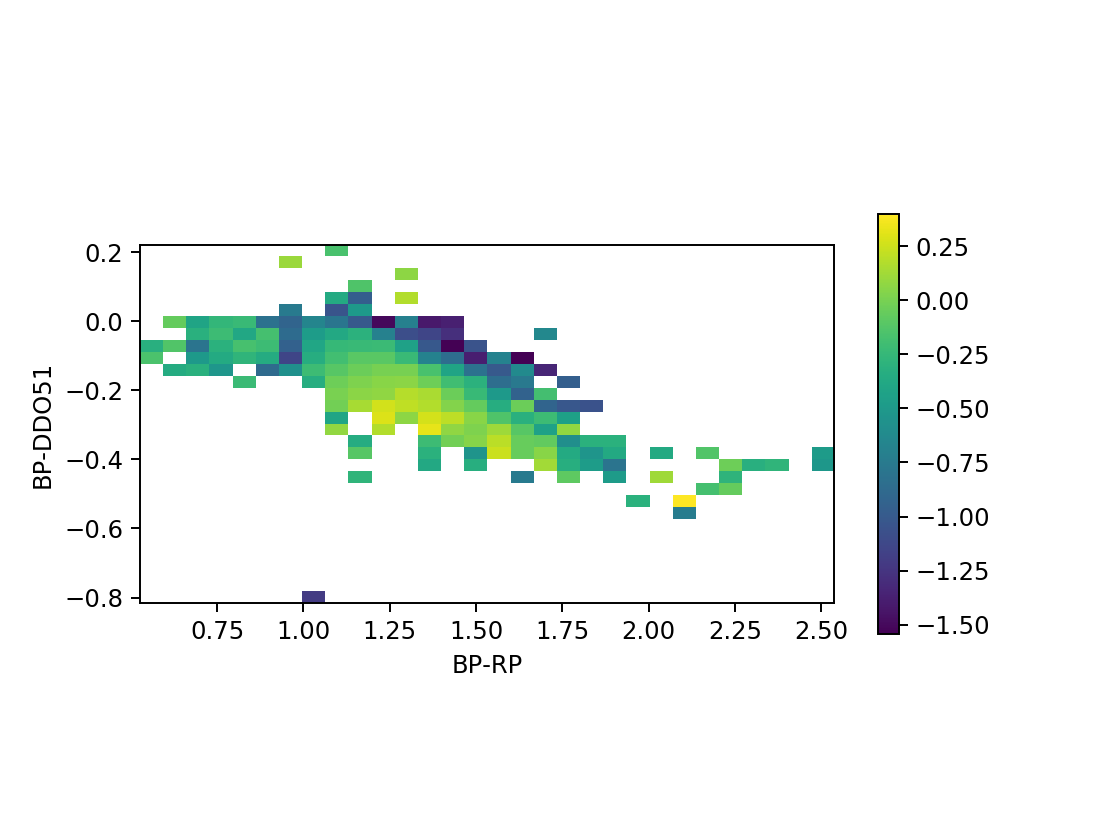

In [6]:
#Import libraries and functions
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib nbagg

#Define variables for colors
bp_rp = catg['bprp']
bp_dd = catg['bpd']

#Construct plot

ret,xedge,yedge,bin = stats.binned_statistic_2d(bp_rp,bp_dd,catg["mgh"],'median',30)

#read out metallicity values using yumi's method
ind, = np.where((bp_rp>=xedge.min())&(bp_rp<=xedge.max())&(bp_dd>=yedge.min())&(bp_dd<=yedge.max()))
ix = np.searchsorted(xedge,bp_rp[ind])
ix = ix-1
iy = np.searchsorted(yedge,bp_dd[ind])
iy = iy-1
new_metal = ret[ix,iy]

#find medium, mean metallicity
mean = np.nanmean(new_metal)
median = np.nanmedian(new_metal)
print("median: ",median)
print("mean: ",mean)
    
#save color plot
fig=plt.figure(2)
ax = plt.imshow(ret.T,extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower')
#plt.scatter(bp_rp[ind],bp_dd[ind],c=new_metal,s=2)

plt.colorbar(shrink=0.65)
plt.ylabel('BP-DDO51')
plt.xlabel('BP-RP')
#plt.title('Calibration Metallicities')
plt.show()
fig.savefig('APOGEE_GAIA_metal_plot.png')
#print("number of matches: ",len(ind),"out of ",len(objs_new["U"]),"stars in ",filename[19:27])

In [16]:
max(catg['MGH'])

9994.5996

In [ ]:
#Load numpy
import numpy as np

#Catalog with 13<G<14
ind=np.where((catg['G']>13)
                &(catg['G']<14))

catg13 = catg[ind]

#Catalog with 14<G<15
ind=np.where((catg['G']>14)
                &(catg['G']<15))

catg14 = catg[ind]

#Catalog with 15<G<16
ind=np.where((catg['G']>15)
                &(catg['G']<16))

catg15 = catg[ind]

<IPython.core.display.Javascript object>


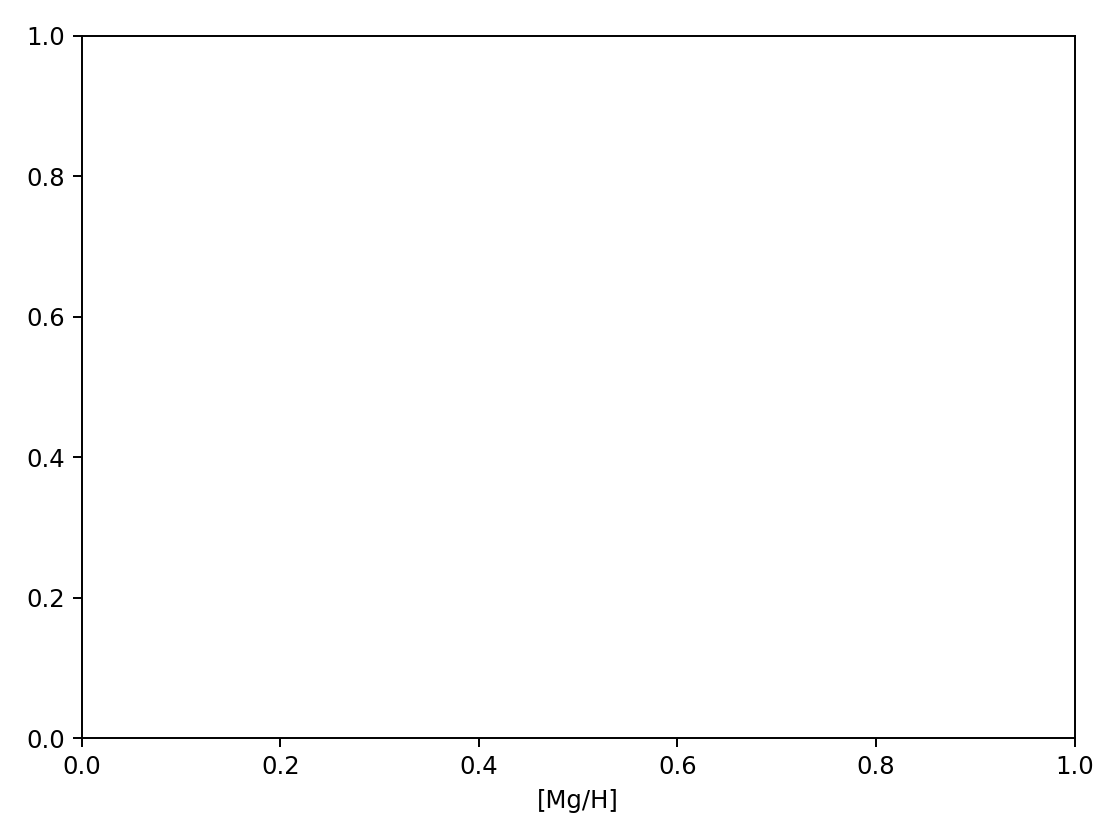

NameError: name 'catg13' is not defined

In [6]:
#Import libraries and functions
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib nbagg

fig = plt.figure()
ax = fig.add_subplot(111)

plt.xlabel('[Mg/H]')
plt.tight_layout()

ax.hist(catg13['mgh'], label='13<G<14', histtype='step', range=(-0.4,0.2),bins=15, normed=True)
#ax.hist(catg14['mgh'], label='14<G<15', histtype='step', range=(-0.4,0.2),bins=30, normed=True)
#ax.hist(catg15['mgh'], label='15<G<16', histtype='step', range=(-0.4,0.2),bins=30, normed=True)

# Create new legend handles but use the colors from the existing ones
handles, labels = ax.get_legend_handles_labels()
new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]

plt.legend(handles=new_handles, labels=labels)
plt.show()

5/31/2018 & 6/1/2018
====

>### I derive photometric metallicities for the full data set using the calibration data.

In [128]:
#Import libraries and functions
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy import stats
from astropy.io import fits
from astropy.table import Table

#Load calibration data
catg = fits.getdata('apogeegaia_giants.fits',1)

#Load full catalog
catgf = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants_nocuts_withgaia_lowred.fits.gz',1)
catgf = Table(catgf)
#catgf.info()

#Define variables for calibration colors
bp_rp = catg['bprp']
bp_dd = catg['bpd']

#Derive bp-rp and bp-ddo51
bp_rp_full = catgf['BP']-catgf['RP']
bp_dd_full = catgf['BP']-catgf['D']


#Append bp_rp_full and bp_dd_full to catg
catgf['BP_RP'] = bp_rp_full
catgf['BP_DD'] = bp_dd_full

In [137]:
print(catgf['BP'][50])
print(catgf['RP'][50])
print(catgf['BP_RP'][50])

12.1476
10.6361
1.51153


In [174]:
#Import libraries and functions
%matplotlib nbagg

#Create bins
ret,xedge,yedge,bin = stats.binned_statistic_2d(bp_rp,bp_dd,catg["mgh"],'median',50)

#filter down catgf to the range and domain of the calibration plot
ind, = np.where((bp_rp_full>=xedge.min())&(bp_rp_full<=xedge.max())&(bp_dd_full>=yedge.min())&(bp_dd_full<=yedge.max()))
catgff = catgf[ind]

ix = np.searchsorted(xedge,catgff['BP_RP'])
ix = ix-1
iy = np.searchsorted(yedge,catgff['BP_DD'])
iy = iy-1
new_metal = ret[ix,iy]

C:\Users\shebe\Anaconda3\lib\site-packages\astropy\table\column.py:929: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, oper)(other)
C:\Users\shebe\Anaconda3\lib\site-packages\astropy\table\column.py:929: RuntimeWarning: invalid value encountered in less_equal
  return getattr(self.data, oper)(other)


In [176]:
catgff['mgh'] = new_metal

In [179]:
tab = Table(catgff)

In [211]:
#tab

In [199]:
indexy = np.isfinite(catgff['mgh'])
catgfff = catgff[indexy]

In [ ]:
catgfff

<IPython.core.display.Javascript object>


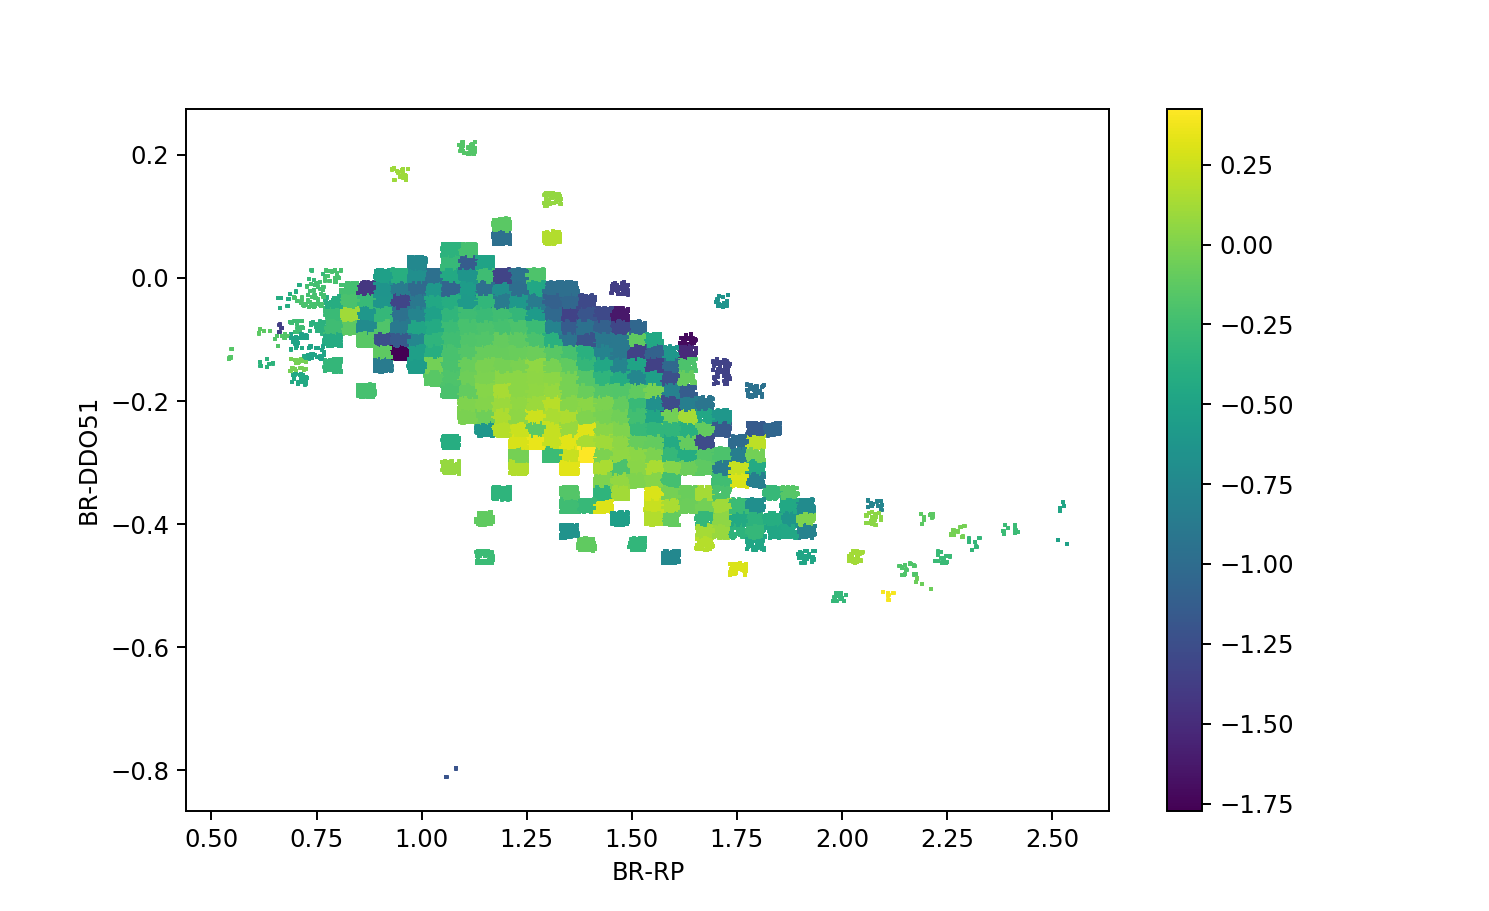

In [274]:
#Scatter plot of matched sky locations
%matplotlib nbagg


plt.scatter(catgfff['BP_RP'],catgfff['BP_DD'],c=catgfff['mgh'],marker='+',s=3)
plt.figsize=(18,16)
ax=plt.gca()
plt.colorbar()
plt.xlabel('BR-RP')
plt.ylabel('BR-DDO51')
#plt.title('Full Catalog with Derived Metallicities')

plt.show()

6/2/2018
====

>### Now that I have metallicities for the full catalog, I get number counts per metallicity for different magnitudes.

In [213]:
#Load numpy
import numpy as np

#Catalog with 16<G<17
ind=np.where((catgfff['G']>16)
                &(catgfff['G']<17))

catg16 = catgfff[ind]

#Catalog with 17<G<18
ind=np.where((catgfff['G']>17)
                &(catgfff['G']<18))

catg17 = catgfff[ind]

#Catalog with 18<G<19
ind=np.where((catgfff['G']>18)
                &(catgfff['G']<19))

catg18 = catgfff[ind]

<IPython.core.display.Javascript object>


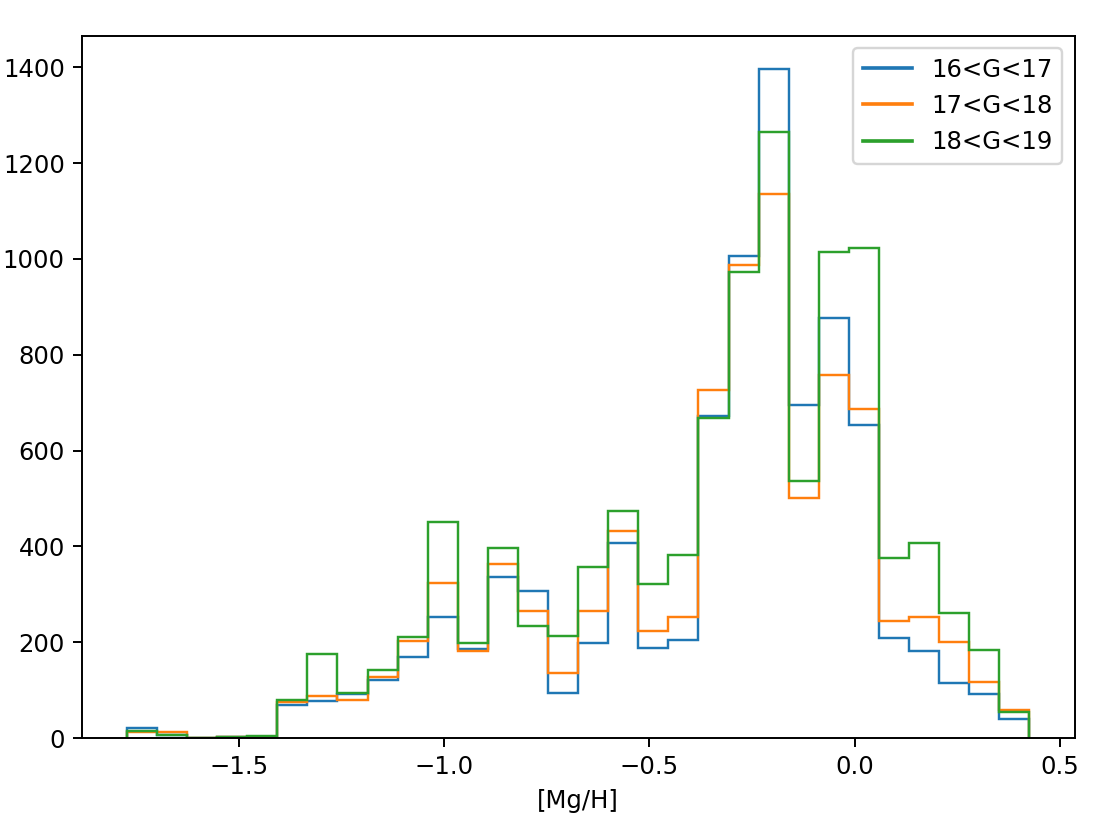

In [270]:
#Import libraries and functions
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib nbagg

#Define variable for plot/figure
fig = plt.figure()
ax = fig.add_subplot(111)

plt.xlabel('[Mg/H]')
plt.tight_layout()

x = ax.hist(catg16['mgh'], label='16<G<17', histtype='step', bins=30, normed=False)
y = ax.hist(catg17['mgh'], label='17<G<18', histtype='step', bins=30, normed=False)
z = ax.hist(catg18['mgh'], label='18<G<19', histtype='step', bins=30, normed=False)

# Create new legend handles but use the colors from the existing ones
handles, labels = ax.get_legend_handles_labels()
new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]

plt.legend(handles=new_handles, labels=labels)
plt.show()

<IPython.core.display.Javascript object>


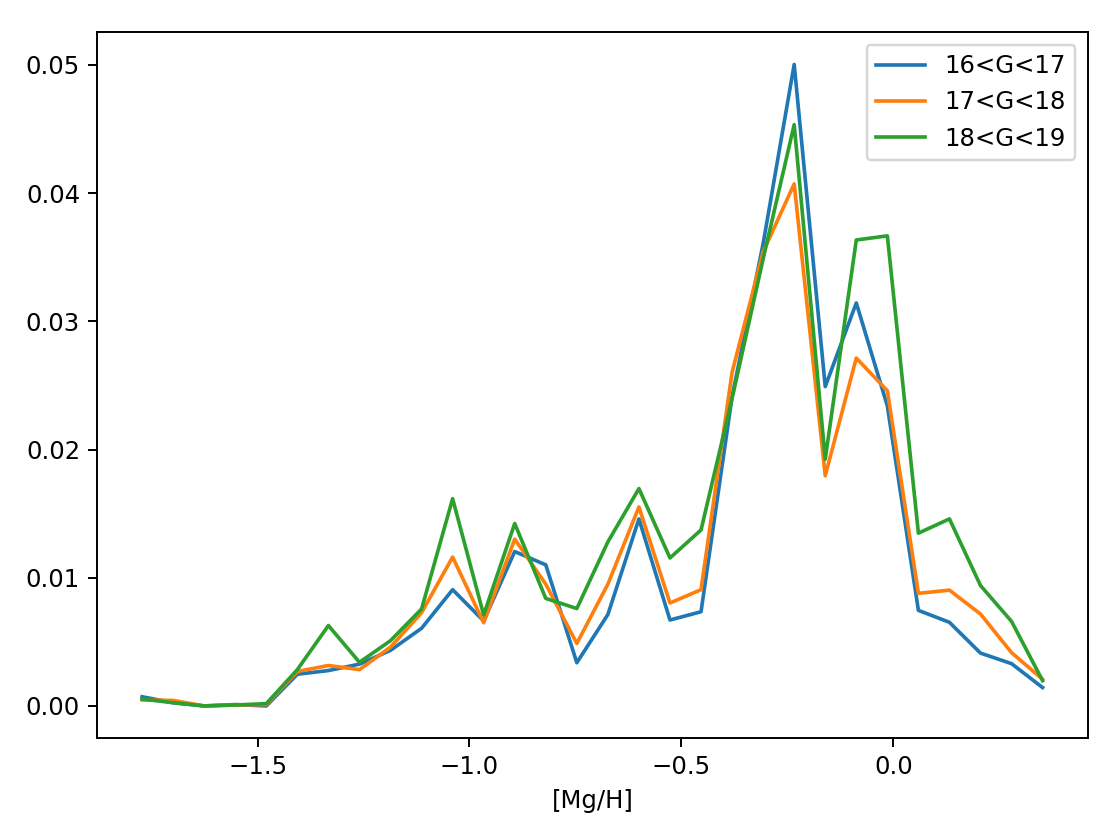

In [273]:
import numpy as np
import pylab as p
%matplotlib nbagg

counts, bins, bars = x
counts1, bins1, bars1 = y
counts2, bins2, bars2 = z

p.plot(bins[:-1],counts/(sum(counts)+sum(counts1)+sum(counts2)),label='16<G<17')
p.show()

p.plot(bins1[:-1],counts1/(sum(counts)+sum(counts1)+sum(counts2)),label='17<G<18')
p.show()
       
p.plot(bins2[:-1],counts2/(sum(counts)+sum(counts1)+sum(counts2)),label='18<G<19')
p.show()


# Create new legend handles but use the colors from the existing ones
handles, labels = ax.get_legend_handles_labels()
new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]

plt.xlabel('[Mg/H]')
plt.tight_layout()

plt.legend(handles=new_handles, labels=labels)

In [247]:
counts, bins, bars=x
p.plot(bins[:-1],counts/sum(counts))
p.show()sum(counts)

8667.0

In [267]:
sum(counts)+sum(counts1)+sum(counts2)

27902.0

 >### David pointed out that the mean values of [Mg/H] are much higher than they should be.  I now will create a 2D histogram of standard deviations of [Mg/H]

median:  0.329744905233
mean:  0.339152814881


<IPython.core.display.Javascript object>


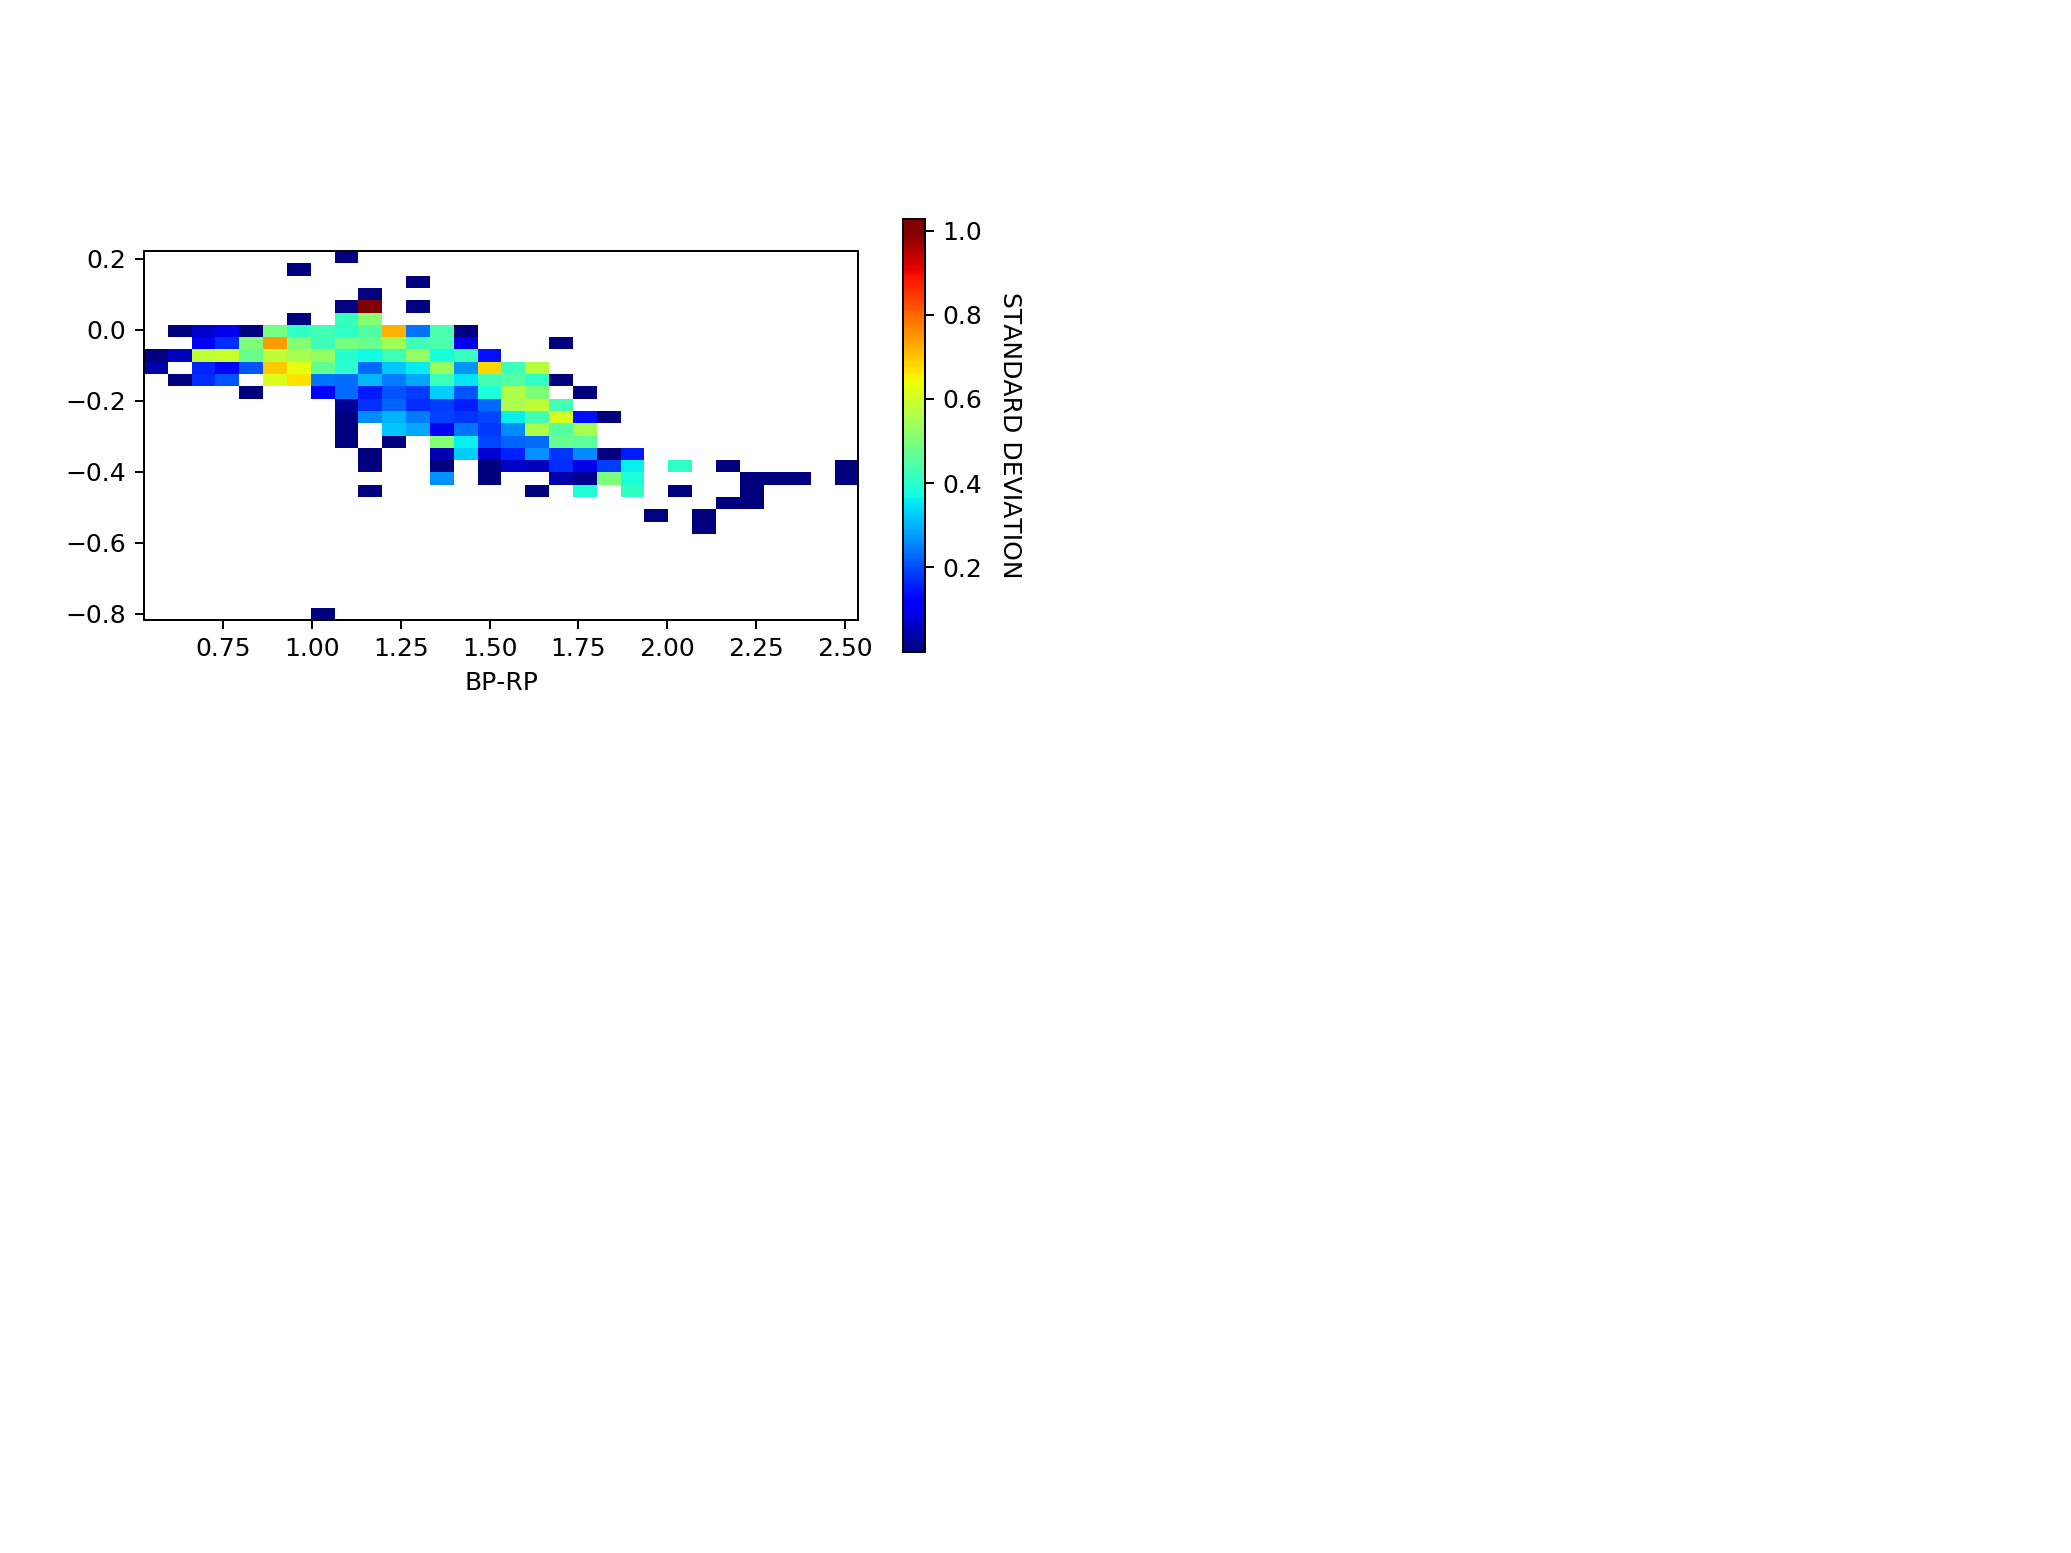

In [112]:
#Import libraries and functions
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.io import fits
from matplotlib import colors
%matplotlib nbagg

#Load catalog
catg = fits.getdata('apogeegaia_giants.fits',1)

#Cut out extreme values of MGH
ind=np.where((catg['mgh']<100))
catg=catg[ind]

#Define variables for colors
bp_rp = catg['bprp']
bp_dd = catg['bpd']

#Construct plot
#CHANGE 'median' TO np.std
ret,xedge,yedge,bin = stats.binned_statistic_2d(bp_rp,bp_dd,catg["mgh"],np.std,30)

#read out metallicity values using yumi's method
ind, = np.where((bp_rp>=xedge.min())&(bp_rp<=xedge.max())&(bp_dd>=yedge.min())&(bp_dd<=yedge.max()))
ix = np.searchsorted(xedge,bp_rp[ind])
ix = ix-1
iy = np.searchsorted(yedge,bp_dd[ind])
iy = iy-1
new_metal = ret[ix,iy]

#find medium, mean metallicity
mean = np.nanmean(new_metal)
median = np.nanmedian(new_metal)
print("median: ",median)
print("mean: ",mean)
    
#save color plot
fig=plt.figure(2)
ax = plt.imshow(ret.T,extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='jet')
#plt.scatter(bp_rp[ind],bp_dd[ind],c=new_metal,s=2)

#bounds = [0,0.2,0.4,0.6,0.8,1.0,1.2]
cbar = plt.colorbar(shrink=0.65, 
     ticks=[0.2,0.4,0.6,0.8,1.0])
cbar.set_clim(0, 1)
cbar.set_label('STANDARD DEVIATION', rotation=270, labelpad=+16)

#plt.ylabel('BP-DDO51')
plt.xlabel('BP-RP')
#plt.title('Calibration Metallicities')
plt.show()
fig.savefig('APOGEE_GAIA_2D_hist_mgh_stddev.png')
#print("number of matches: ",len(ind),"out of ",len(objs_new["U"]),"stars in ",filename[19:27])

In [108]:
(catg['mgh'].min(),catg['mgh'].max())

(-2.3788433, 0.52573693)

 >### I now create a 2D histogram of mean values of [Fe/H]

median:  -0.3831522801
mean:  -0.470626622257


<IPython.core.display.Javascript object>


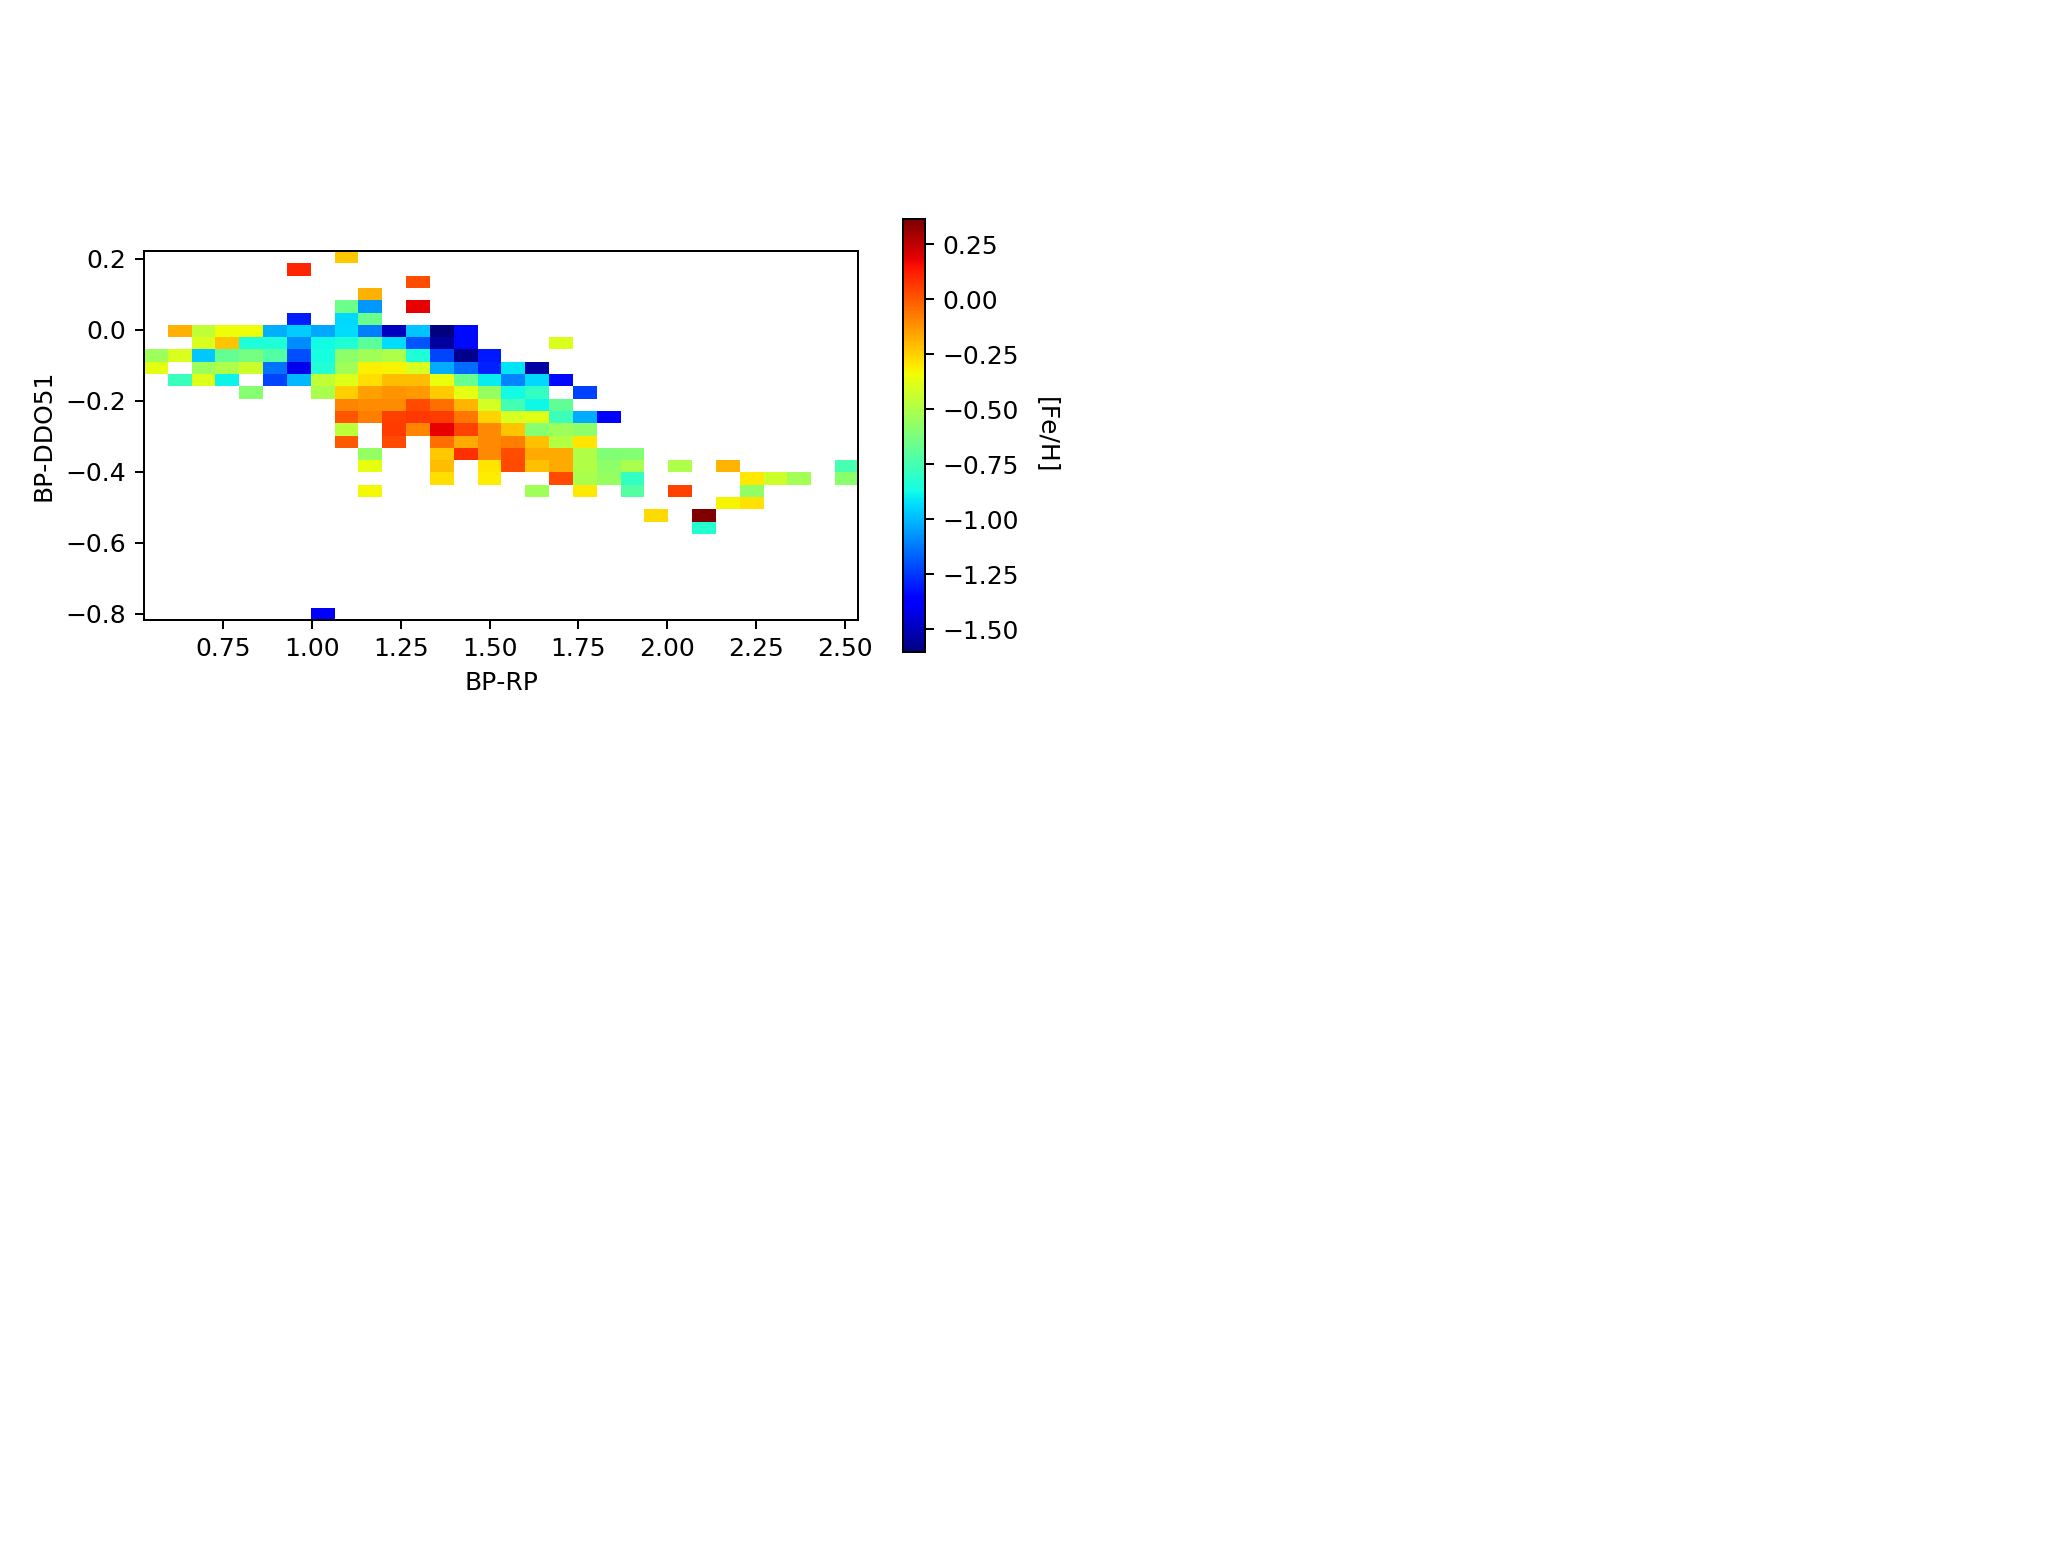

In [105]:
#Import libraries and functions
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.io import fits
from matplotlib import colors
%matplotlib nbagg
#Load catalog
catg = fits.getdata('apogeegaia_giants.fits',1)

#Define variables for colors
bp_rp = catg['bprp']
bp_dd = catg['bpd']

#Construct plot
#CHANGE 'mgh' TO 'metals' AND CALCULATE 'mean'
ret,xedge,yedge,bin = stats.binned_statistic_2d(bp_rp,bp_dd,catg['metals'],'mean',30)

#read out metallicity values using yumi's method
ind, = np.where((bp_rp>=xedge.min())&(bp_rp<=xedge.max())&(bp_dd>=yedge.min())&(bp_dd<=yedge.max()))
ix = np.searchsorted(xedge,bp_rp[ind])
ix = ix-1
iy = np.searchsorted(yedge,bp_dd[ind])
iy = iy-1
new_metal = ret[ix,iy]

#find medium, mean metallicity
mean = np.nanmean(new_metal)
median = np.nanmedian(new_metal)
print("median: ",median)
print("mean: ",mean)
    
#save color plot
fig=plt.figure(2)
ax = plt.imshow(ret.T,extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='jet')
#plt.scatter(bp_rp[ind],bp_dd[ind],c=new_metal,s=2)

cbar = plt.colorbar(shrink=0.65)
cbar.set_label('[Fe/H]', rotation=270, labelpad=+16)
plt.ylabel('BP-DDO51')
plt.xlabel('BP-RP')
#plt.title('Calibration Metallicities')
plt.show()
fig.savefig('APOGEE_GAIA_2D_hist_feh_mean.png')
#print("number of matches: ",len(ind),"out of ",len(objs_new["U"]),"stars in ",filename[19:27])

 >### I now create a 2D histogram of standard deviations of [Fe/H]

median:  0.360935181379
mean:  0.389898794952


<IPython.core.display.Javascript object>


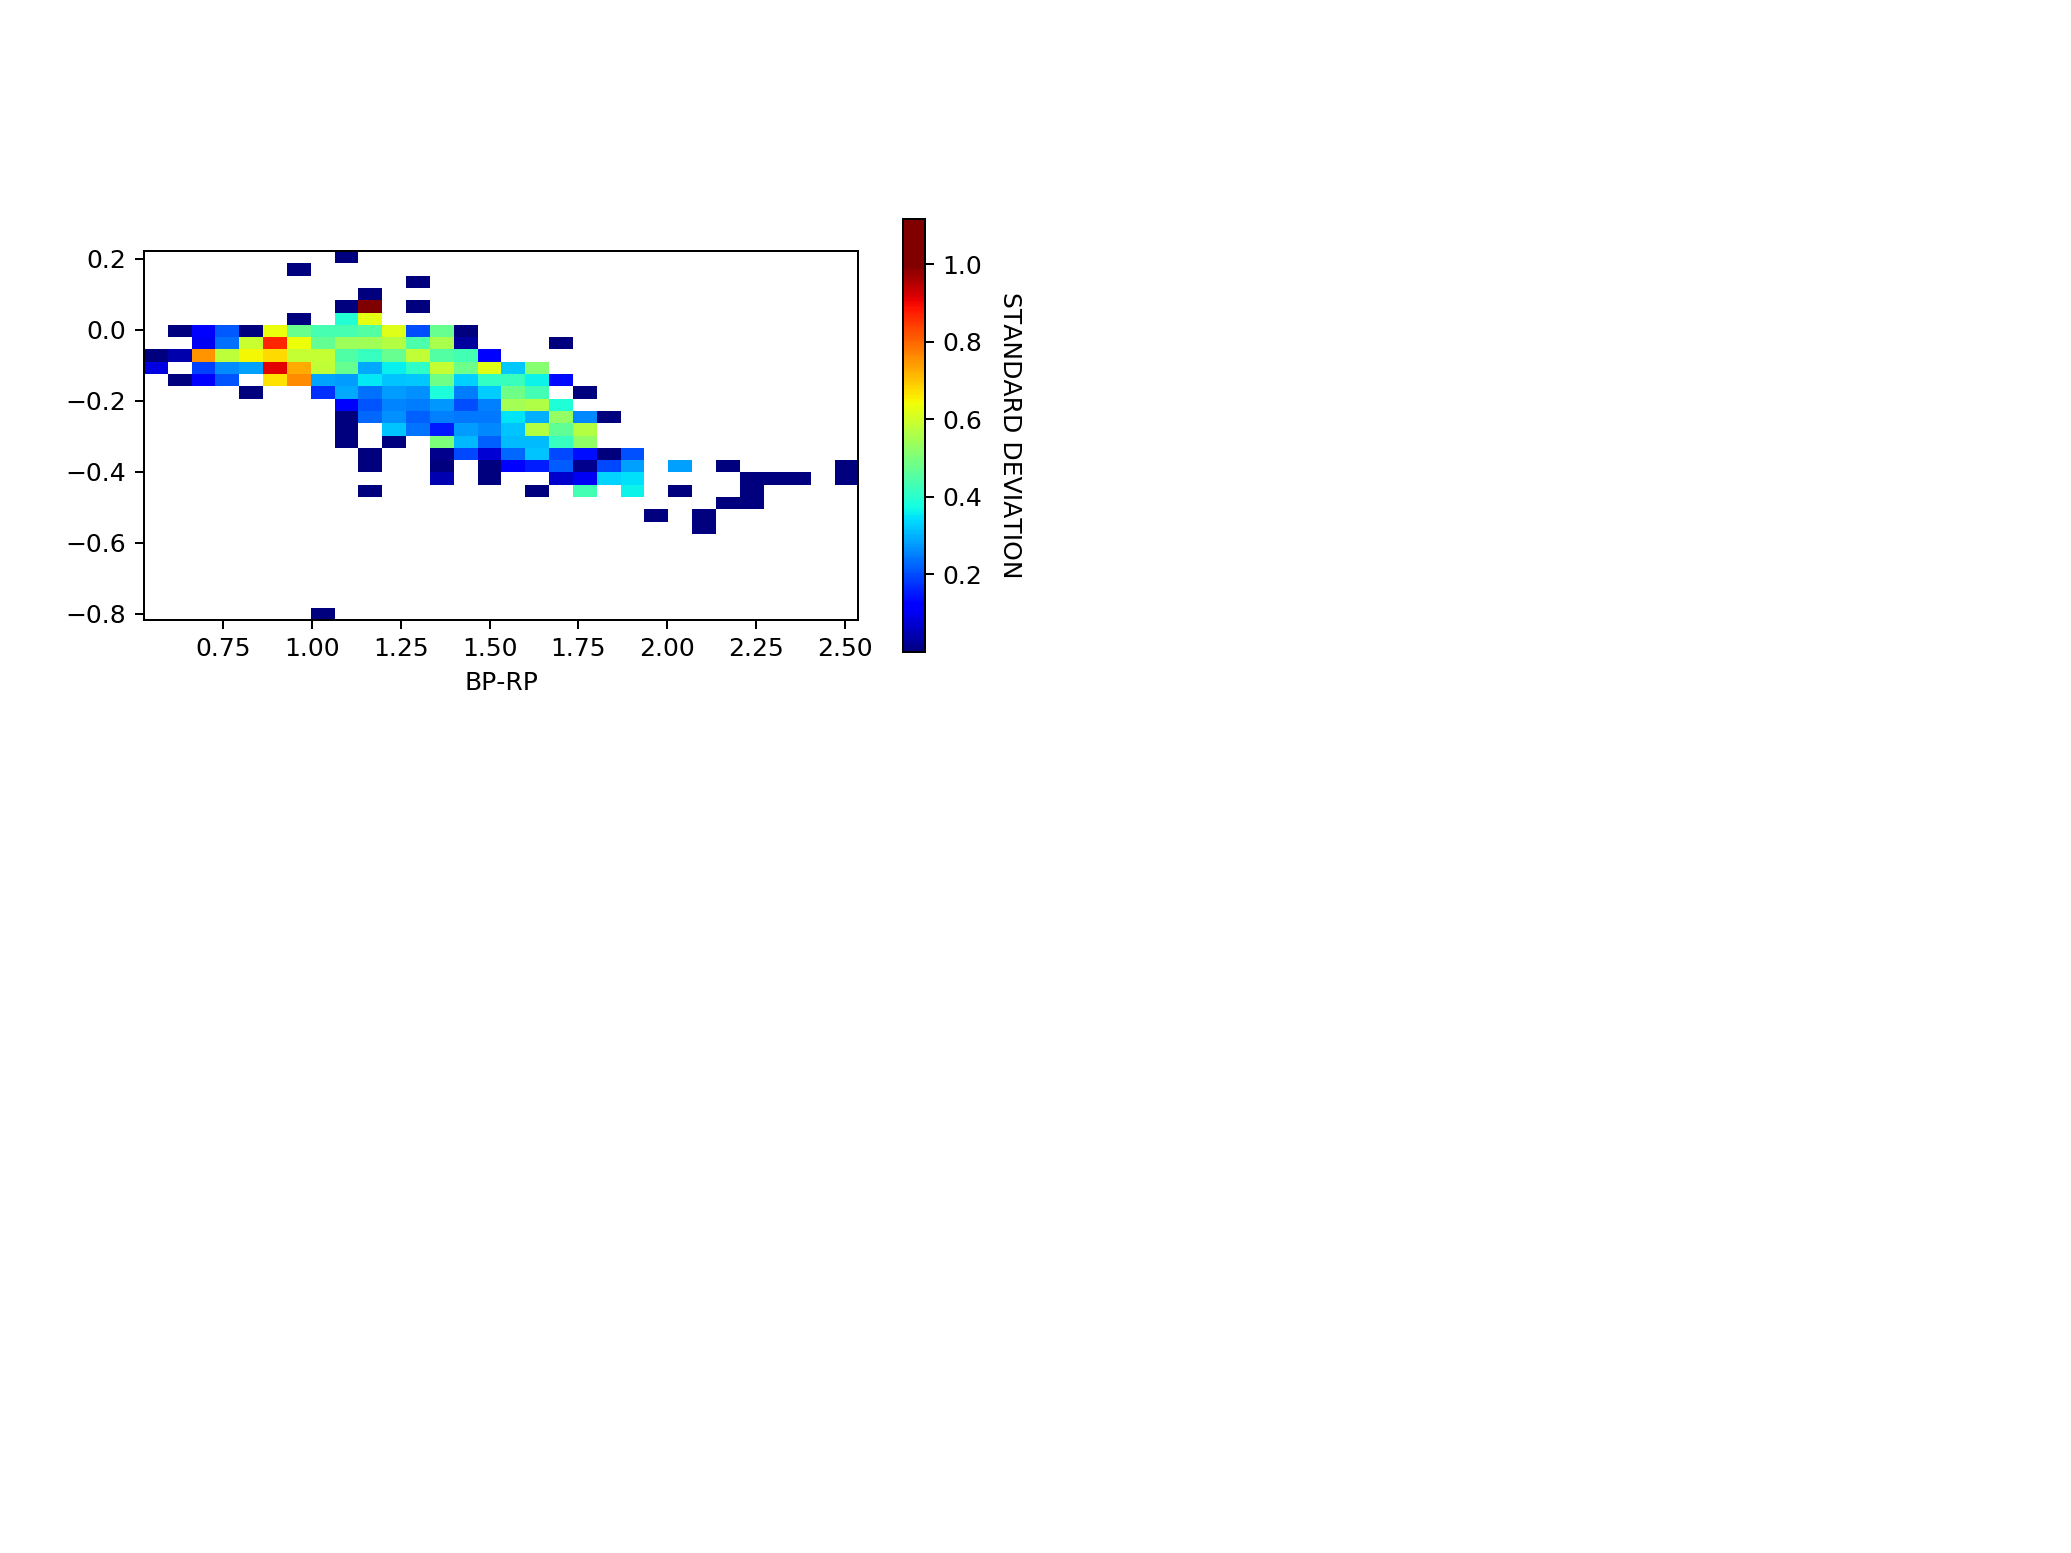

In [106]:
#Import libraries and functions
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.io import fits
from matplotlib import colors

%matplotlib nbagg

#Load catalog
catg = fits.getdata('apogeegaia_giants.fits',1)

#Define variables for colors
bp_rp = catg['bprp']
bp_dd = catg['bpd']

#Construct plot
#CHANGE 'mgh' TO 'metals' AND CALCULATE standard deviation
ret,xedge,yedge,bin = stats.binned_statistic_2d(bp_rp,bp_dd,catg['metals'],np.std,30)

#read out metallicity values using yumi's method
ind, = np.where((bp_rp>=xedge.min())&(bp_rp<=xedge.max())&(bp_dd>=yedge.min())&(bp_dd<=yedge.max()))
ix = np.searchsorted(xedge,bp_rp[ind])
ix = ix-1
iy = np.searchsorted(yedge,bp_dd[ind])
iy = iy-1
new_metal = ret[ix,iy]

#find medium, mean metallicity
mean = np.nanmean(new_metal)
median = np.nanmedian(new_metal)
print("median: ",median)
print("mean: ",mean)
    
#save color plot
fig=plt.figure(2)
ax = plt.imshow(ret.T,extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='jet')
#plt.scatter(bp_rp[ind],bp_dd[ind],c=new_metal,s=2)

#bounds = [0,0.2,0.4,0.6,0.8,1.0,1.2]
cbar = plt.colorbar(shrink=0.65, 
     ticks=[0.2,0.4,0.6,0.8,1.0])
cbar.set_label('STANDARD DEVIATION', rotation=270, labelpad=+16)
cbar.set_clim(0, 1)

#pylab.pcolor(, r, z)

#pylab.colorbar()

#plt.ylabel('BP-DDO51')
plt.xlabel('BP-RP')
#plt.title('Calibration Metallicities')
plt.show()
fig.savefig('APOGEE_GAIA_2D_hist_feh_stddev.png')
#print("number of matches: ",len(ind),"out of ",len(objs_new["U"]),"stars in ",filename[19:27])

median:  -0.194066464901
mean:  -0.216185234891


<IPython.core.display.Javascript object>


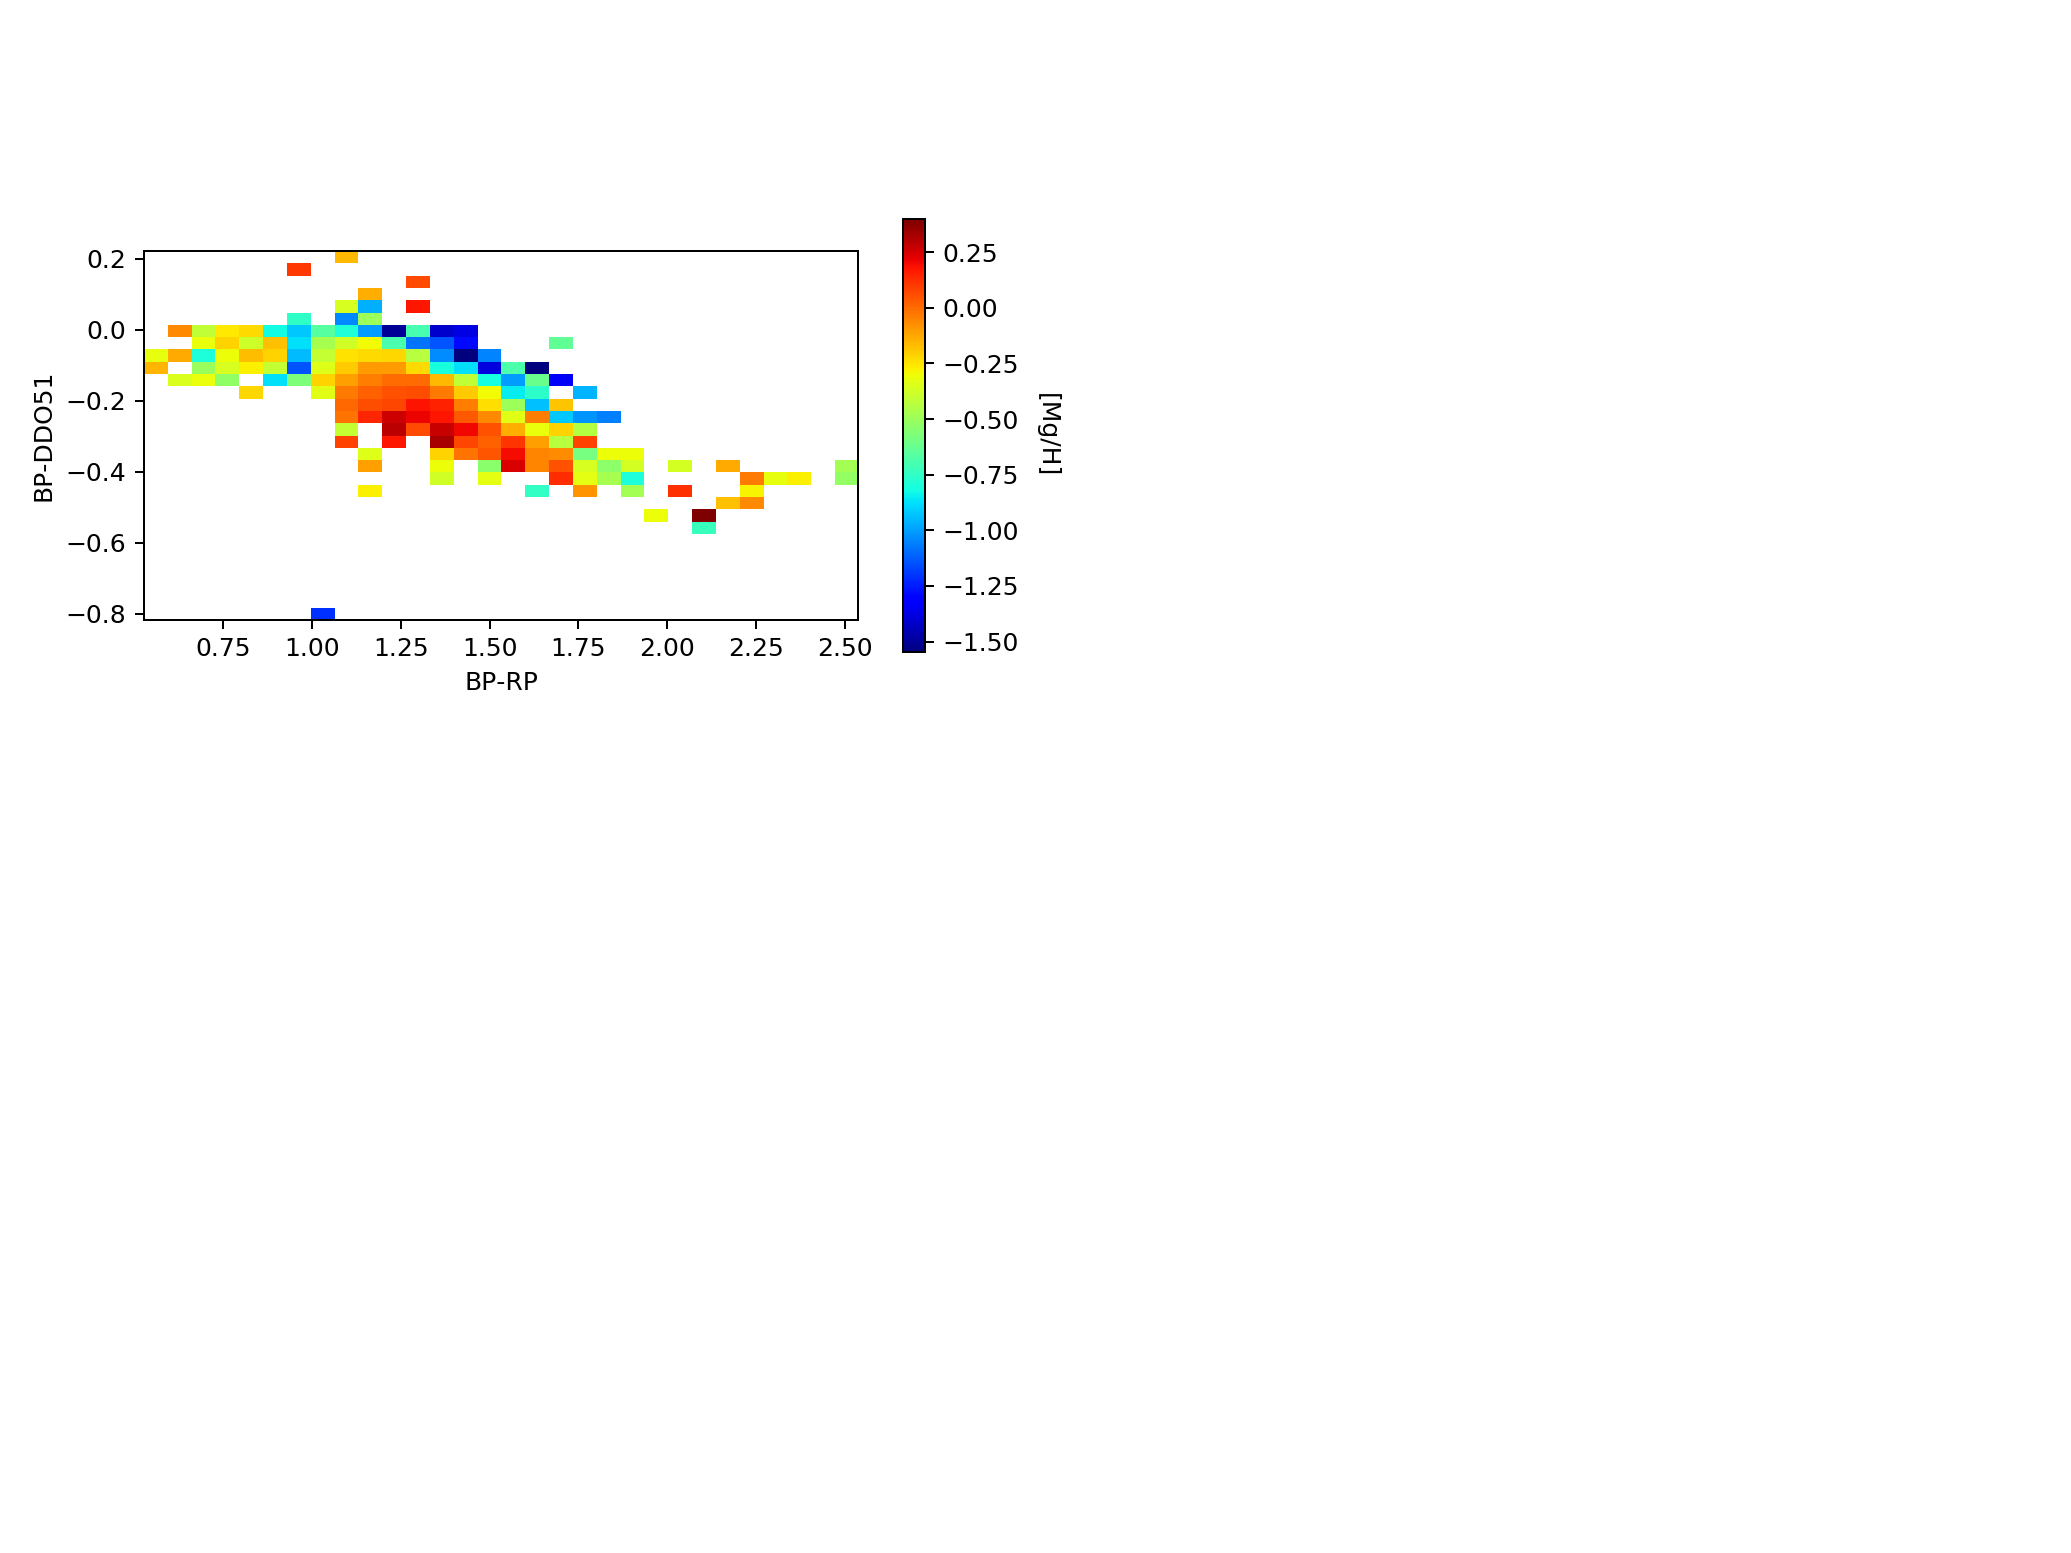

In [104]:
#Import libraries and functions
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.io import fits
from matplotlib import colors
%matplotlib nbagg

#Define variables for colors
bp_rp = catg['bprp']
bp_dd = catg['bpd']

#Construct plot

ret,xedge,yedge,bin = stats.binned_statistic_2d(bp_rp,bp_dd,catg["mgh"],'median',30)

#read out metallicity values using yumi's method
ind, = np.where((bp_rp>=xedge.min())&(bp_rp<=xedge.max())&(bp_dd>=yedge.min())&(bp_dd<=yedge.max()))
ix = np.searchsorted(xedge,bp_rp[ind])
ix = ix-1
iy = np.searchsorted(yedge,bp_dd[ind])
iy = iy-1
new_metal = ret[ix,iy]

#find medium, mean metallicity
mean = np.nanmean(new_metal)
median = np.nanmedian(new_metal)
print("median: ",median)
print("mean: ",mean)
    
#save color plot
fig=plt.figure(2)
ax = plt.imshow(ret.T,extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='jet')
#plt.scatter(bp_rp[ind],bp_dd[ind],c=new_metal,s=2)

cbar = plt.colorbar(shrink=0.65)
cbar.set_label('[Mg/H]', rotation=270, labelpad=+16)
plt.ylabel('BP-DDO51')
plt.xlabel('BP-RP')
#plt.title('Calibration Metallicities')
plt.show()
fig.savefig('APOGEE_GAIA_2D_hist_mgh_mean.png')
#print("number of matches: ",len(ind),"out of ",len(objs_new["U"]),"stars in ",filename[19:27])

In [113]:
len(catg)

4397

In [111]:
xedge

array([ 0.5263052 ,  0.59337702,  0.66044884,  0.72752066,  0.79459248,
        0.8616643 ,  0.92873611,  0.99580793,  1.06287975,  1.12995157,
        1.19702339,  1.26409521,  1.33116703,  1.39823885,  1.46531067,
        1.53238249,  1.59945431,  1.66652613,  1.73359795,  1.80066977,
        1.86774158,  1.9348134 ,  2.00188522,  2.06895704,  2.13602886,
        2.20310068,  2.2701725 ,  2.33724432,  2.40431614,  2.47138796,
        2.53845978])

In [114]:
yedge

array([-0.81687981, -0.78227444, -0.74766907, -0.7130637 , -0.67845833,
       -0.64385296, -0.6092476 , -0.57464223, -0.54003686, -0.50543149,
       -0.47082612, -0.43622075, -0.40161538, -0.36701001, -0.33240464,
       -0.29779927, -0.26319391, -0.22858854, -0.19398317, -0.1593778 ,
       -0.12477243, -0.09016706, -0.05556169, -0.02095632,  0.01364905,
        0.04825442,  0.08285978,  0.11746515,  0.15207052,  0.18667589,
        0.22128126])

In [116]:
yedge[0]-yedge[1]

-0.034605368971824646

In [117]:
xedge[0]-xedge[1]

-0.067071819305419944